## Regularization to Reduce Overfitting

### Regression

Term bias has meaning, which is if the algorithm has underfit the data, meaning that it's just not even able to fit the training set that well. There's a clear pattern in the training data that the algorithm is just unable to capture. Basically the algorithm is biased towards linear regression(here).<br>
![Fittings](fit.png)<br>
If you're real estate agents, the idea that you want your learning algorithm to do well, even on examples that are not on the training set, that's called generalization. Technically we say that you want your learning algorithm to generalize well, which means to make good predictions even on brand new examples that it has never seen before. <br>
In last example we might a curve that fits all the points exactly. We could have error exactly zero since error is zero on all traning examples. This curve is wingly. If we have a new point that is pink here then it predicts bigger houses price to be cheaper than other houses. This isnt good model to predict houses either.Hence it has overfitting problem because even though it fits the training set very well, it has fit the data almost too well, hence is overfit. It does not look like this model will generalize to new examples that's never seen before. Another term for this is that the algorithm has high variance.The intuition behind overfitting or high-variance is that the algorithm is trying very hard to fit every single training example. If an exmaple is slightly diff here then out function that algorithm fits could end up being totally different.  If two different machine learning engineers were to fit this fourth-order polynomial model, to just slightly different datasets, they could end up with totally different predictions or highly variable predictions.<br>
To recap, if you have too many features like the fourth-order polynomial on the right, then the model may fit the training set well, but almost too well or overfit and have high variance. On the flip side if you have too few features, then in this example, like the one on the left, it underfits and has high bias. In this example, using quadratic features x and x squared, that seems to be just right.<br>

### Classification

![Fitting](fitting.png)<br>
Middle model would generalize to new patients preety easily. In right hand side model we fitted very high order polynomial with many features. Having all these higher-order polynomial features allows the algorithm to choose this really over the complex decision boundary. If the features are tumor size in age, and you're trying to classify tumors as malignant or benign, then this doesn't really look like a very good model for making predictions. It wont generalize well to new traning examples.

## Addressing Overfitting

One way to address this problem is to collect more training data. If you're able to get more data, that is more training examples on sizes and prices of houses, then with the larger training set, the learning algorithm will learn to fit a function that is less wiggly. You can continue to fit a high order polynomial or some of the function with a lot of features, and if you have enough training examples, it will still do okay.<br>
A second option for addressing overfitting is to see if you can use fewer features. It turns out that if you have a lot of features like these but don't have enough training data, then your learning algorithm may also overfit to your training set. Choosing the most appropriate set of features to use is sometimes also called feature selection. One major disadvantage is we might be loosing important useful information.<br>
Third method is regularization. Now if you were to eliminate some of these features, say, if you were to eliminate the feature x4, that corresponds to setting this parameter to 0. So setting a parameter to 0 is equivalent to eliminating a feature, which is what we saw on the previous slide. It turns out that regularization is a way to more gently reduce the impacts of some of the features without doing something as harsh as eliminating it outright.  What regularization does is encourage the learning algorithm to shrink the values of the parameters without necessarily demanding that the parameter is set to exactly 0. It prevents features to have overly large effect. We mostly dont regularize b and dont encourage in making b smaller. In practice regularizing b doesnt make much difference.

## Lab: Overfitting

In [13]:
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import Output
from plt_overfit import overfit_example, output
plt.style.use('./deeplearning.mplstyle')

Output()

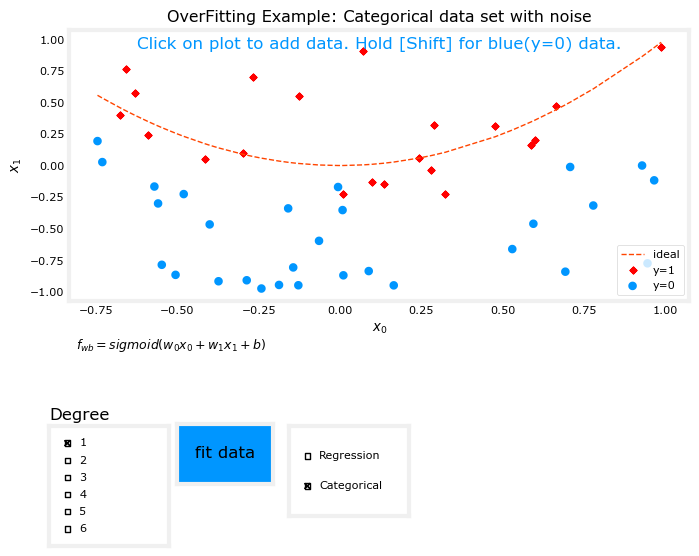

In [15]:
plt.close("all")
display(output)
ofit = overfit_example(False)

In the plot above you can:

- switch between Regression and Categorization examples
- add data
- select the degree of the model
- fit the model to the data

Here are some things u should try:
- Fit the data with degree = 1; Note 'underfitting'.
- Fit the data with degree = 6; Note 'overfitting'
- tune degree to get the 'best fit'
- add data: <br>
   1. extreme examples can increase overfitting (assuming they are outliers).
   2. nominal examples can reduce overfitting
- 'fit' does not use gradient descent to improve speed since gradient descent is slow and used on smaller datasets.

## Cost function with Regulization

Now, we have a previous example where quadratic function fits the data nicely whereas high order polynomial overfits the data. Suppose we had a way to make w3 and w4 very small i.e close to zero. Here is how it can be done. We will add some large number times (suppose 1000) w3 and simillarly w4 to the cost function and now in order to reduce the cost function, the w3 and w4 must be very small and hence indirectly we are cancelling out w3 and w4. We end with a fit to data that is much closer to quadratic function.<br>
![Intution](int.png)<br>
On the last slide we penalize or we say we regularized only W3 and W4. But more generally, the way that regularization tends to be implemented is if you have a lot of features, say a 100 features, you may not know which are the most important features and which ones to penalize (means adding more cost and discouaing its use). So the way regularization is typically implemented is to penalize all of the features or more precisely, you penalize all the WJ parameters and it's possible to show that this will usually result in fitting a smoother simpler, less weekly function that's less prone to overfitting.<br>
Since we dont know which terms are imp and which ones to shrink so we shrink all of them by adding a new term in the cost function.<br>
`J = (1/2\*m)\*summition of (f(x_i) - y_i )^2 + (lamba/2\*m)*summition from 1 to n of w_j^2`<br>
Here lamda is called regularization parameter. By convention we're not going to penalize the parameter b for being large. Some people also put b^2 in multiplication with lamda for it to regularize.<br>
So to summarize in this modified cost function, we want to minimize the original cost, which is the mean squared error cost plus additionally, the second term which is called the regularization term. And so this new cost function trades off two goals that you might have. Trying to minimize this first term encourages the algorithm to fit the training data well by minimizing the squared differences of the predictions and the actual values. And try to minimize the second term. The algorithm also tries to keep the parameters wj small, which will tend to reduce overfitting. Diff value of lamda helps balance the above 2 goals.<br>

### How to choose lamda ?

If lamda is zero then 2nd term becomes zero and hence overfitting occurs giving us over wiggly curve. If lamda is a very big term then huge weight on the regularization term and then all the values of w are preety much very close to 0, then f(x) = b and hence we get a straight horizontal line and this underfits.<br>
What you want is some value of lambda that is in between that more appropriately balances these first and second terms of trading off, minimizing the mean squared error and keeping the parameters small.<br>
![Lamda](lamda.png)<br>
Purple line shows if we choose perfect lamda.

## Regularized Linear Regression

We have to find w and b to minimize the new cost function now. As we were earliar using gradient descent and repeatly changing values of w,b we will do the same here except for the part here the differentiated term will have 1 new term. We are not regularizing b so updated b remains as before.<br>
![Formulas](f.png)<br>

WHAT IS EXACTLY REGULARIZATION DOING ? <br>
On simplifying the terms, we see the new w is basically same i.e w - regular update. The only change is we are multiplying the w with (1-(alpha*lamda)/m). Since these all are small terms subtracted from 1. So at each step we are multiplying w with some number like 0.9998.<br>
What regularization is doing on every single iteration is you're multiplying w by a number slightly less than 1, and that has effect of shrinking the value of w_j just a little bit. This gives us another view on why regularization has the effect of shrinking the parameters w_j a little bit on every iteration, and so that's how regularization works.
![Maths](m.png)
![Derivation](d.png)<br>
The summition term is no longer there since we are taking derivative w.r.t w_j ...all other terms w_k where k is not equal to j are constants.

## Regularized Logistic Regression

When we do this then even though with less dataset and huge number of features, we get the curve that is exactly right fit for the model. Again here also we dont regularize b.<br>
![Descent](des.png)

## Lab: Regularized Cost and Gradient 

In [36]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid
np.set_printoptions(precision=8)

### Cost function for linear regression

In [40]:
def compute_cost_linear_reg(X,y,w,b,lamda_ = 1):
    '''
    Computes the cost over all examples
    Returns:
        total_cost(scalar)
    '''

    m = X.shape[0]
    n = len(w)
    cost  = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i],w) + b
        cost  = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)

    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = (lamda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost
    return total_cost

In [54]:
np.random.seed(1)
#insures if we are taking random numbers then everytime we get same random numbers
X_tmp = np.random.rand(5,6) # 5*6 matrix generated with numbers between 0 to 1 from uniform distribution
#hence we have 5 examples with 6 features
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
# np.random.rand generates a random array of 6 numbers and reshapes them to make sure they are 1D
# -0.5 shifts each value so that the range becomes [0,1) to [-0.5,0.5)
# also here without reshape it wont make much diff
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214275


### Cost function for Logistic function

In [50]:
def compute_cost_logistic_reg(X,y,w,b,lambda_ = 1):
    '''
    Computes the cost over all examples
    Returns:
        total_cost(scalar)
    '''

    m,n = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost/m

    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = (lambda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost
    return total_cost

In [56]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


### Gradient Descent with regularization

#### Gradient function for regularized linear regression

In [74]:
def compute_gradient_linear_reg(X,y,w,b,lambda_):
    '''
    Computes the gradient for linear regression
    Returns:
        dj_dw
        dj_db
    '''

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db,dj_dw

In [76]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


#### Gradient function for regularized logistic function

In [87]:
def compute_gradient_logistic_reg(X,y,w,b,lambda_):
    '''
    Computes the gradient for linear regression
    Returns:
        dj_dw
        dj_db
    '''

    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b);
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i *X[i][j]
        dj_db = dj_db + err_i

    dj_dw /= m
    dj_db /= m

    for j in range(n):
        dj_dw[j] += (lambda_/m)*w[j]

        return dj_db,dj_dw

In [89]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.2616524064842717, 0.02954655798610976]


### Rerun over-fitting example

Output(outputs=({'traceback': ['\x1b--------------------------------------------------------------------…

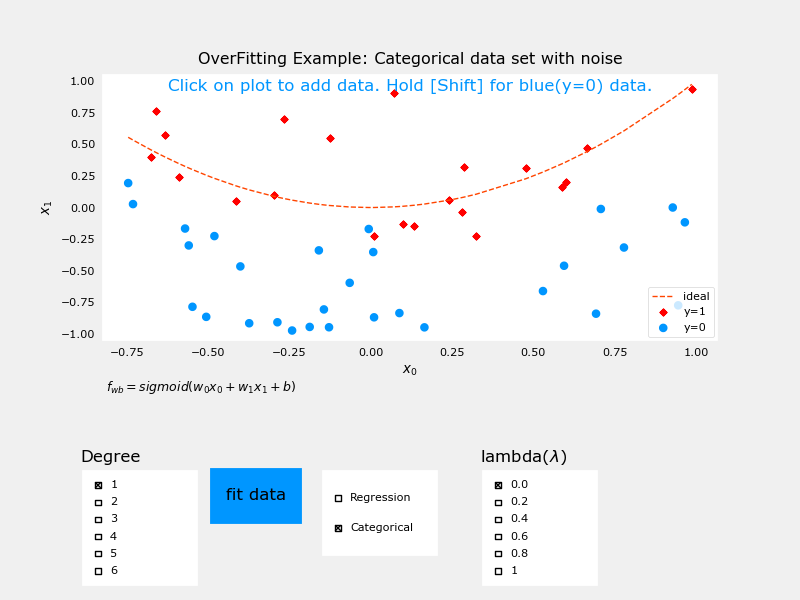

In [97]:
plt.close("all")
display(output)
ofit = overfit_example(True)

## Final Practice Lab : Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [4]:
#building a model to see if the student gets admitted into a university as not
#load the dataset
X_train,y_train = load_data("data/ex2data1.txt")

In [5]:
#lets get familarized with the dataset
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [6]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [7]:
#checking the dimensions of variables
print ('The shape of X_train is: ' + str(X_train.shape))
#str converts the shape of X into string
# '+' is used to perform concatenation
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


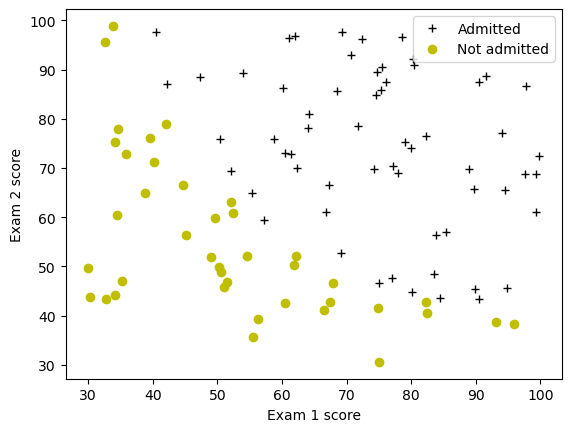

In [8]:
#visualize your data

# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")

In [9]:
def sigmoid(z):
    ''' 
    Compute the sigmoid of z
    Returns:
        g(ndarray)
    '''

    g = 1 / (1+np.exp(-z))

    return g

In [10]:
#checking if above code is correct
value  = 0
print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [16]:
#the code must also work for matrices and vectors so lets try that
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


In [17]:
#cost function
def compute_cost(X,y,w,b,*argv):
    '''
    Computes the cost over all examples
    Returns:
        total_cost
    '''

    m,n = X.shape
    total_cost = 0.
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        total_cost += (-y[i]*np.log(f_wb_i)) - (1-y[i])*np.log(1-f_wb_i)
    total_cost /= m

    return total_cost

In [18]:
#checking if above function is correct
# Compute and display cost with w and b initialized to zeros
m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print(f'Cost at initial w and b (zeros): {cost:.3f}')

Cost at initial w and b (zeros): 0.693


In [23]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print(f'Cost at test w and b (non-zeros): {cost:.3f}')


# UNIT TESTS
compute_cost_test(compute_cost)

Cost at test w and b (non-zeros): 0.218
All tests passed!


In [27]:
#gradient for logistic regression
def compute_gradient(X,y,w,b,*argv):
    '''
    Computes the gradient for logistic regression
    Returns:
        dj_dw
        dj_db
    '''
    m,n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    err = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_db,dj_dw

In [29]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [31]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]
All tests passed!


In [33]:
#learning parameters using gradient descent
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num,lambda_):
    '''
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    Returns:
        w(scalar)
        b(scalar)
    '''

    m=len(X)
    J_hist = []
    w_hist = []

    for i in range(num):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_hist.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num/10) == 0 or i == (num-1):
            w_hist.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}   ")
        
    return w_in, b_in, J_hist, w_hist #return w and J,w history for graphing

In [35]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


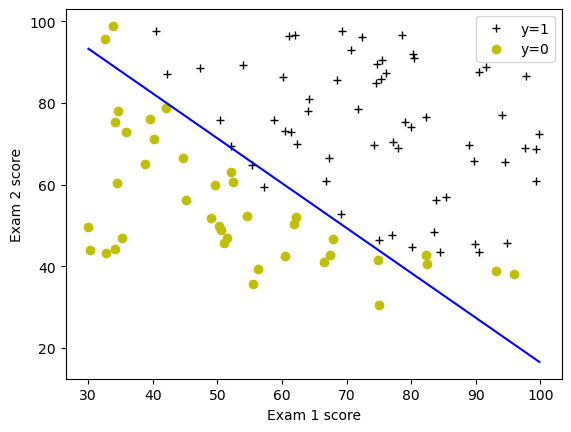

In [36]:
#plotting the decision boundary
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [37]:
#evaluate the quality of parameters we have found by seeing how well the learned model predicts on traning set
#we are creating the following function to produce 0 or 1 given a dataset and learned paramters w and b
def predict(X,w,b):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression paramters w
    returns:
        p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    '''

    m,n = X.shape
    p = np.zeros(m)

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        if(f_wb_i<0.5):
            p[i] = 0
        else:
            p[i] = 1

    return p

In [38]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


In [39]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


### Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). 

In [42]:
# load dataset
X_train, y_train = load_data("data/ex2data2.txt")

In [43]:
#view variables
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [44]:
#check dimensions
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


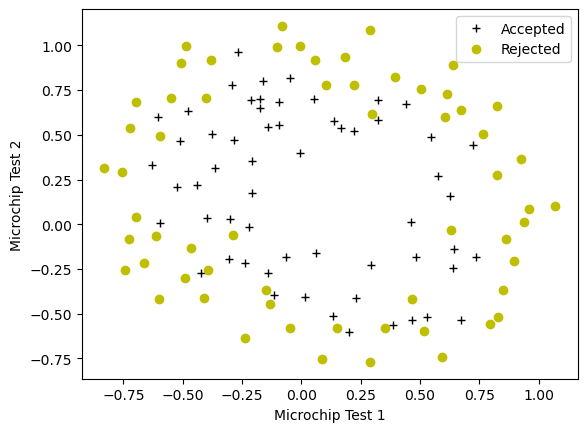

In [45]:
#visualize your data
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

We can see from the above plot that data cant be seperated by straight line

#### Feature Mapping
Feature mapping (also called feature transformation or feature expansion) is the process of transforming input features into a higher-dimensional space to help a model learn non-linear relationships.Some models (like logistic regression) are linear, they can only separate data using straight lines (or hyperplanes).
If the data is not linearly separable, we can map the features into a new space where the data becomes linearly separable.<br>
We convert x1,x2 into higher dimensions like x1^2 or x1x2 etc.

In [62]:
#we are going to map the data into 6th power
#as a result of this mapping, our vector of 2 features has been transformed into 27 dimentional vector
#27 dimensions because :
# map_feature(x) = [x1,x2,x1^2,x1x2,x2^2,x1^2....x1x5^5 x2^6]

print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [64]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


While feature mapping helps us to build more expressive classifier but it is more susceptible to overfitting so now we do regulization

In [69]:
#cost function for regularized logistic regression

def compute_cost_reg(X,y,w,b,lambda_=1):
    '''
    Computes the cost over all examples
    Returns:
        total_cost
    '''

    m,n = X.shape
    cost_without_reg = compute_cost(X,y,w,b)

    reg_cost = 0.

    for i in range(n):
        reg_cost += w[i]**2
    reg_cost = (lambda_*reg_cost)/(2*m)

    total_cost = cost_without_reg + reg_cost

    return total_cost

In [73]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5 #shape[1] gives number of columns
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

Regularized cost : 0.6618252552483948
All tests passed!


In [81]:
#gradient for regularized logistic regression

def compute_gradient_reg(X,y,w,b,lambda_=1):
    '''
    Computes the gradient for logistic regression with regularization
    Returns:
        dj_dw
        dj_db
    '''

    m,n = X.shape
    dj_db,dj_dw = compute_gradient(X,y,w,b)

    for i in range(n):
        dj_dw[i] += (lambda_*w[i])/m
    
    return dj_db,dj_dw

In [83]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548703, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]
All tests passed!


In [85]:
#learning paramters using gradient descent
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


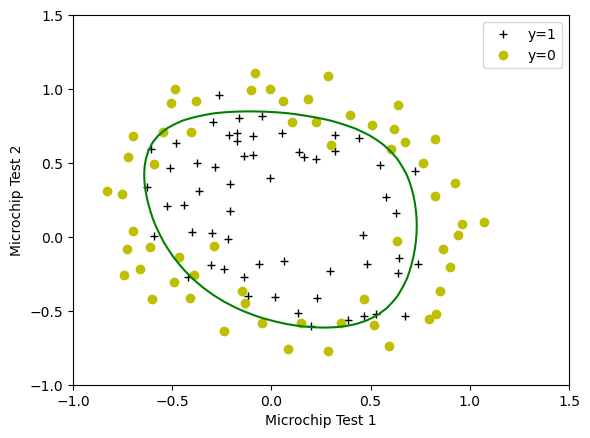

In [87]:
#plotting the decision boundary
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

#### Evaluating the regularized the logistic regression model
You will use the predict function that you implemented above to calculate the accuracy of the regularized logistic regression model on the training set.

In [91]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
